In [37]:
import pandas as pd
import risk_toolkit as rk
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Efficient frontier

In [38]:
ind = pd.read_csv('data/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates=True) / 100

ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')

ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


Let's cleanup the column names

In [39]:
ind.columns = ind.columns.str.strip()

ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [40]:
ind_2 = rk.get_ind_returns()

#### Plotting the drawdown

<AxesSubplot:>

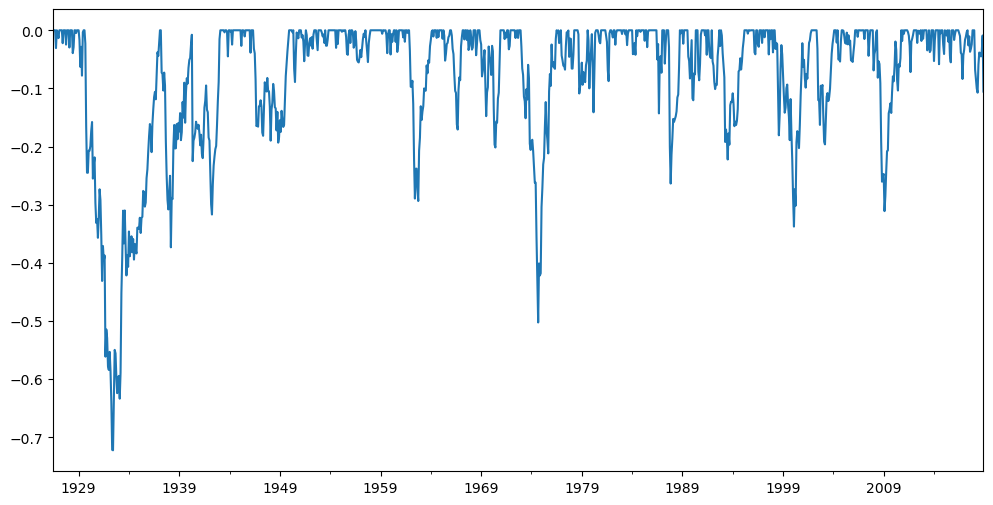

In [41]:
rk.drawdown(ind_2['Food'])['Drawdown'].plot.line(figsize=(12,6))

#### Cornish-Fisher VaR

In [42]:
rk.gaussian_var(ind_2[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

Now for every portfolio

In [43]:
rk.gaussian_var(ind_2, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

<AxesSubplot:>

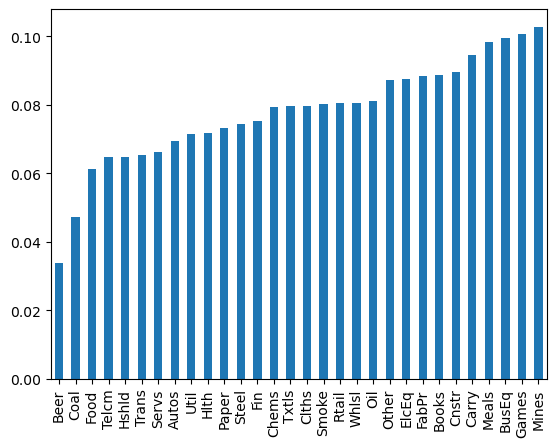

In [44]:
rk.gaussian_var(ind_2, modified=True).sort_values().plot.bar()

Estimating only from 2000 onwards

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

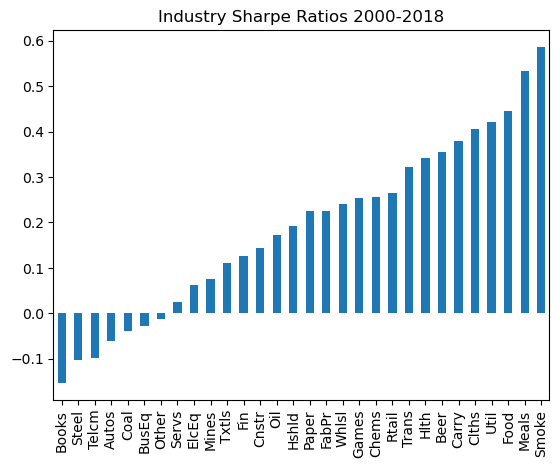

In [45]:
rk.sharpe_ratio(ind_2['2000':], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios 2000-2018')

#### Let's work with the efficient frontier

Let's use only the returns from 1995-2000

In [46]:
exp_return = rk.annualized_returns(ind_2['1995':'2000'], 12)

<AxesSubplot:>

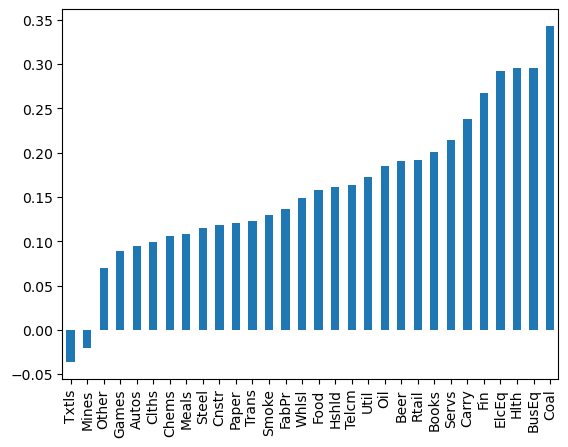

In [47]:
exp_return.sort_values().plot.bar()

##### Now we need the variance-covariance matrix

In [48]:
cov = ind_2['1995':'2000'].cov()

In [49]:
cov.shape

(30, 30)